In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 


c:\Users\Mouadh Fraj\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [63]:
BATCH_SIZE = 32
IMAGE_SIZE = 28
CHANNELS = 1
EPOCHS=20

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "ROI_data",
    shuffle = True,
    batch_size =BATCH_SIZE
)

Found 2830 files belonging to 2 classes.


In [4]:
class_names =dataset.class_names
class_names

['Benign', 'Cancer']

In [5]:
len(dataset)


89

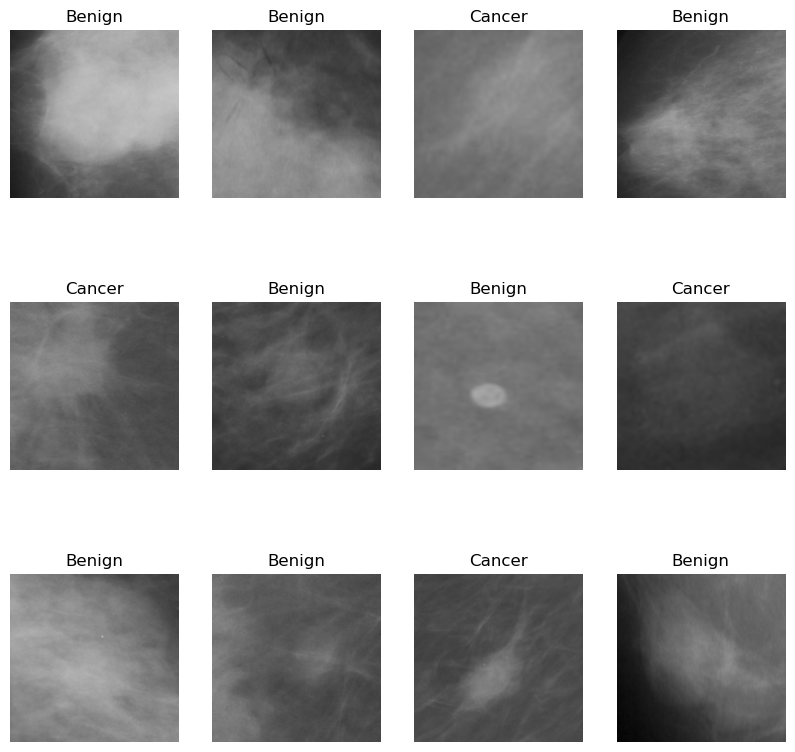

In [6]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range (12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype(int))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [8]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [9]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [10]:
len(train_ds)

71

In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [75]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])



In [83]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),  
    layers.Dense(1, activation='sigmoid')
])
model.build(input_shape=input_shape)



In [84]:
model.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_16 (Sequential)  (None, 28, 28, None)      0         
                                                                 
 conv2d_28 (Conv2D)          (32, 26, 26, 32)          320       
                                                                 
 batch_normalization_28 (Ba  (32, 26, 26, 32)          128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_28 (MaxPooli  (32, 13, 13, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (32, 11, 11, 32)          9248      
                                                                 
 batch_normalization_29 (Ba  (32, 11, 11, 32)        

In [77]:
custom_optimizer = optimizers.Adam(learning_rate=0.001)  
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [1]:
from tensorflow.keras.regularizers import l2

c:\Users\Mouadh Fraj\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
model.add(layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.Dropout(0.3))

In [78]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)



Epoch 1/20


71/71 [==============================] - 12s 134ms/step - loss: 0.9143 - accuracy: 0.5652 - val_loss: 0.6759 - val_accuracy: 0.5586
Epoch 2/20
71/71 [==============================] - 1s 11ms/step - loss: 0.7672 - accuracy: 0.5856 - val_loss: 0.7346 - val_accuracy: 0.5469
Epoch 3/20
71/71 [==============================] - 1s 10ms/step - loss: 0.7070 - accuracy: 0.6043 - val_loss: 0.7223 - val_accuracy: 0.5469
Epoch 4/20
71/71 [==============================] - 1s 11ms/step - loss: 0.6739 - accuracy: 0.6056 - val_loss: 0.8960 - val_accuracy: 0.5430
Epoch 5/20
71/71 [==============================] - 1s 10ms/step - loss: 0.6650 - accuracy: 0.6198 - val_loss: 0.9789 - val_accuracy: 0.5430
Epoch 6/20
71/71 [==============================] - 1s 10ms/step - loss: 0.6563 - accuracy: 0.6220 - val_loss: 0.6509 - val_accuracy: 0.6758
Epoch 7/20
71/71 [==============================] - 1s 10ms/step - loss: 0.6422 - accuracy: 0.6335 - val_loss: 0.6448 - val_accuracy: 0.6289
Epoch 8/20
71/71 [====

In [79]:
scores = model.evaluate(test_ds)

10/10 [==============================] - 1s 96ms/step - loss: 0.6692 - accuracy: 0.5969


first image to predict
first image's actual label: Benign
1/1 [==============================] - 0s 309ms/step
predicted label: Benign


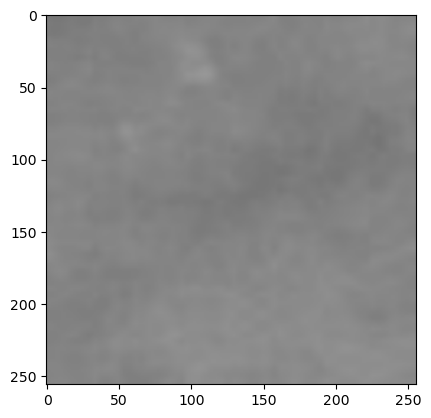

In [80]:
import numpy as np 
for images_batch, labels_batch in test_ds.take(1):
   first_image=images_batch[0].numpy().astype('uint8')
   first_label=labels_batch[0].numpy()
   print("first image to predict")
   plt.imshow(first_image)
   print("first image's actual label:", class_names[first_label])
   batch_prediction = model.predict(images_batch)
   print ("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [81]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 34ms/step


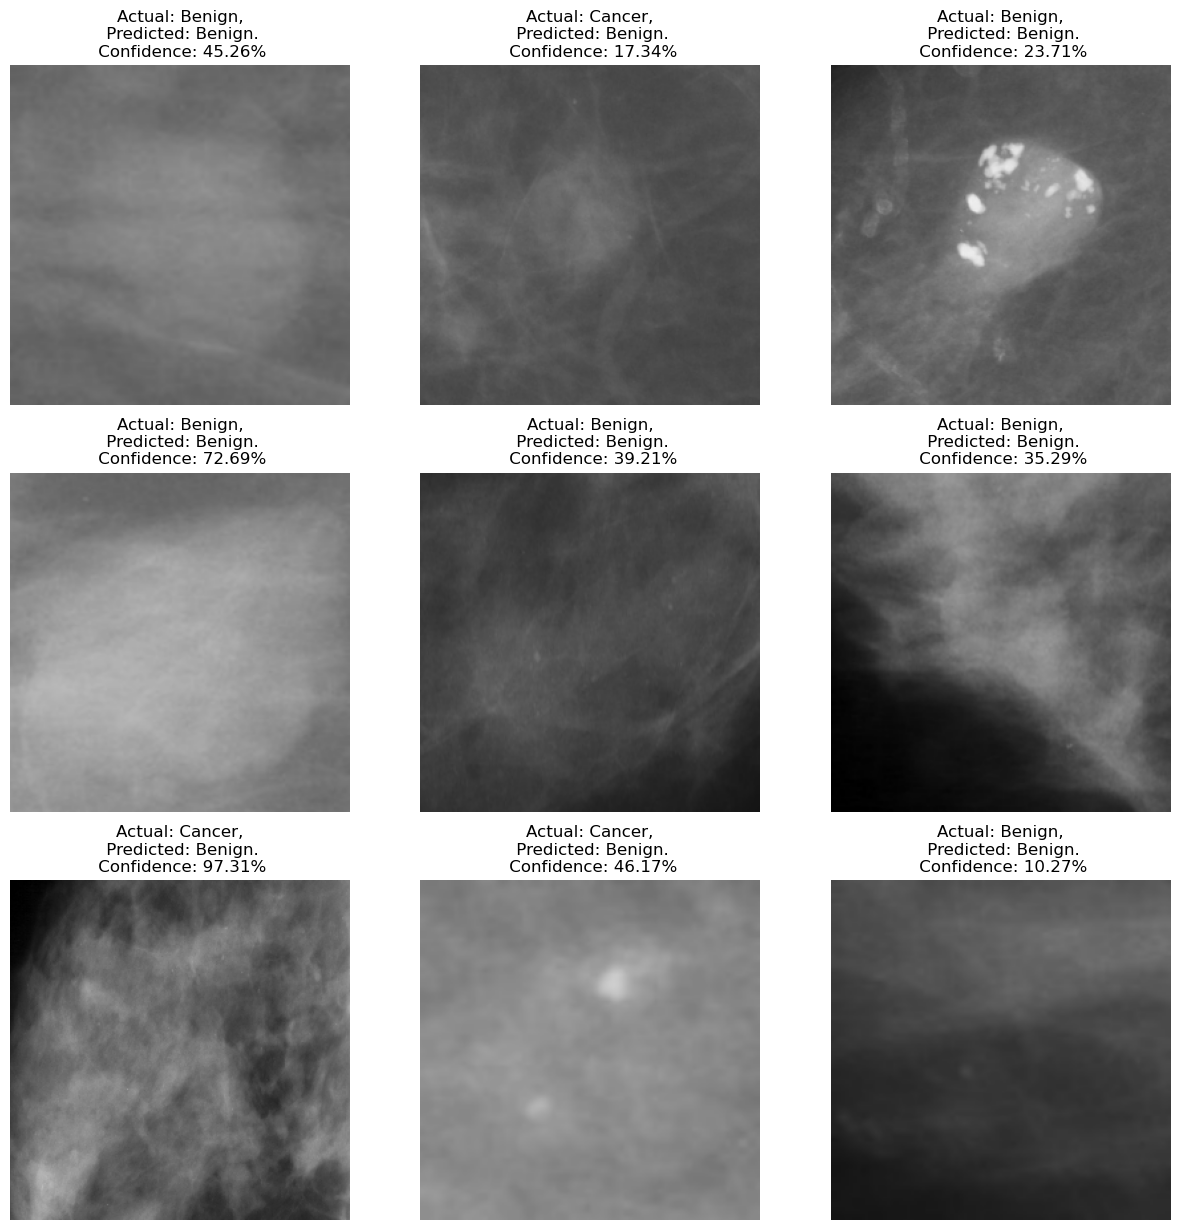

In [82]:

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")